In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

data_all=pd.read_csv('data/data_all.csv')
df = data_all.copy()

In [8]:
df

,number,title,user,labels,state,locked,created_at,updated_at,closed_at,comments
0,3148,开了加速依然显示服务器连接失败,1517su,['question'],open,False,2024-01-23T04:31:58Z,2024-01-23T04:31:58Z,NaN,0
1,3147,🐛[BUG] 正常使用中会闪退,lingfeng01,['bug'],open,False,2024-01-22T10:44:10Z,2024-01-22T16:04:07Z,NaN,1
2,3144,🐛[BUG] 开机启动任务计划请求的操作需要提升,Chun-J1,['bug'],open,False,2024-01-21T03:58:22Z,2024-01-21T03:58:47Z,NaN,0
3,3143,🧐[Question] windows睡眠 遊戲時數,Laijason9170,['question'],open,False,2024-01-20T05:39:46Z,2024-01-20T05:39:46Z,NaN,0
4,3142,🐛[BUG] GITHUB加速会出现SSL连不上，GITHUB.com 443报警,Lennonleslie,['bug'],open,False,2024-01-19T04:20:36Z,2024-01-19T04:20:36Z,NaN,0
...,...,...,...,...,...,...,...,...,...,...
85,2985,Project Mobius,AigioL,[],open,False,2023-11-02T11:49:43Z,2023-11-02T11:49:43Z,NaN,0
86,2984,🐛[BUG] 动态头像框显示异常,2315095914,['bug'],open,False,2023-10-31T04:34:20Z,2023-10-31T04:34:56Z,NaN,0
87,2983,🐛[BUG] 应用状态栏，会进行多重显示,Kee02p,['bug'],open,False,2023-10-31T00:28:43Z,2023-11-13T06:40:06Z,NaN,1
88,2981,👑[Enhancement] 开机自启不显示切换账号且要手动授权管理员权限,2315095914,['enhancement'],open,False,2023-10-30T04:35:02Z,2023-11-13T06:42:52Z,NaN,1


In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

df

,number,title,user,labels,state,locked,created_at,updated_at,closed_at,comments
0,3148,开了加速依然显示服务器连接失败,1517su,['question'],open,False,2024-01-23 04:31:58+00:00,2024-01-23 04:31:58+00:00,NaT,0
1,3147,🐛[BUG] 正常使用中会闪退,lingfeng01,['bug'],open,False,2024-01-22 10:44:10+00:00,2024-01-22 16:04:07+00:00,NaT,1
2,3144,🐛[BUG] 开机启动任务计划请求的操作需要提升,Chun-J1,['bug'],open,False,2024-01-21 03:58:22+00:00,2024-01-21 03:58:47+00:00,NaT,0
3,3143,🧐[Question] windows睡眠 遊戲時數,Laijason9170,['question'],open,False,2024-01-20 05:39:46+00:00,2024-01-20 05:39:46+00:00,NaT,0
4,3142,🐛[BUG] GITHUB加速会出现SSL连不上，GITHUB.com 443报警,Lennonleslie,['bug'],open,False,2024-01-19 04:20:36+00:00,2024-01-19 04:20:36+00:00,NaT,0
...,...,...,...,...,...,...,...,...,...,...
85,2985,Project Mobius,AigioL,[],open,False,2023-11-02 11:49:43+00:00,2023-11-02 11:49:43+00:00,NaT,0
86,2984,🐛[BUG] 动态头像框显示异常,2315095914,['bug'],open,False,2023-10-31 04:34:20+00:00,2023-10-31 04:34:56+00:00,NaT,0
87,2983,🐛[BUG] 应用状态栏，会进行多重显示,Kee02p,['bug'],open,False,2023-10-31 00:28:43+00:00,2023-11-13 06:40:06+00:00,NaT,1
88,2981,👑[Enhancement] 开机自启不显示切换账号且要手动授权管理员权限,2315095914,['enhancement'],open,False,2023-10-30 04:35:02+00:00,2023-11-13 06:42:52+00:00,NaT,1


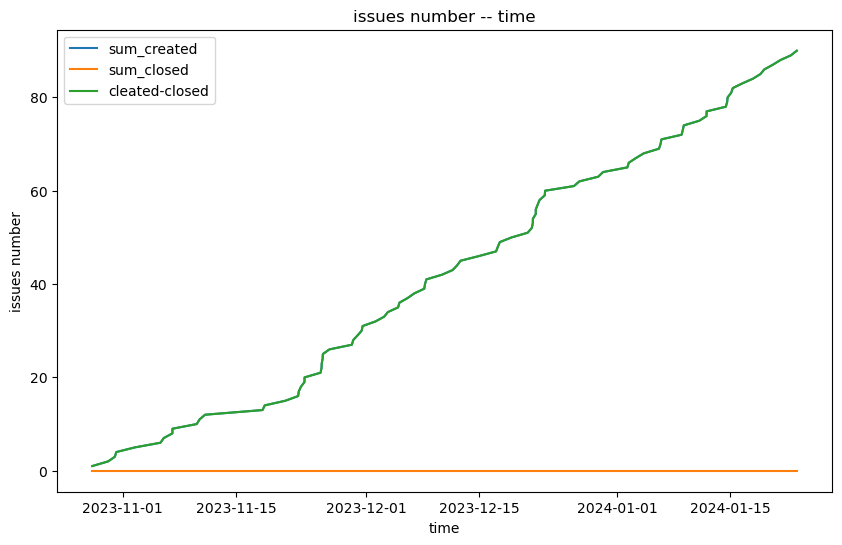

In [40]:
# 将提交时间设为索引列，并按日期进行排序
df = df.set_index('created_at').sort_index()

# 创建累计提交数量列和累计结束数量列
df['sum_created'] = range(1, len(df) + 1)
df['sum_closed'] = df['closed_at'].notnull().cumsum()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sum_created'], label='sum_created')
plt.plot(df.index, df['sum_closed'], label='sum_closed')
plt.plot(df.index, df['sum_created'] - df['sum_closed'], label='cleated-closed')

# 设置图形属性
plt.xlabel('time')
plt.ylabel('issues number')
plt.title('issues number -- time')
plt.legend()

# 展示折线图
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (14,) and arg 1 with shape (0,).

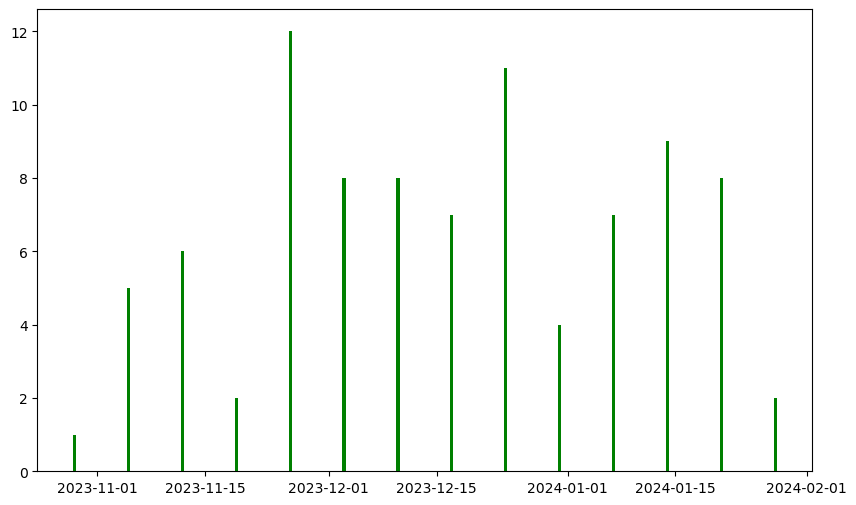

In [41]:
# 计算每周提交和结束的数量
weekly_submissions = df.resample('W').size()
weekly_completed = df[df['closed_at'].notnull()].resample('W').size()

# 绘制柱状图
plt.figure(figsize=(10, 6))
x = weekly_submissions.index
width = 0.4

plt.bar(x, weekly_submissions, width, color='green', label='一周内提交的问题数')
plt.bar(x, weekly_completed, width, color='red', label='提交的已结束问题数')

# 设置图形属性
plt.xlabel('time')
plt.ylabel('issues number')
plt.title('一周内提交的问题数和已结束问题数')
plt.legend()

# 旋转x轴标签以避免重叠
plt.xticks(rotation=45)

# 展示柱状图
plt.show()

In [27]:
monthly_counts = df.groupby([df['created_at'].dt.year, df['created_at'].dt.month]).size()
monthly_counts

created_at  created_at
2023        10             4
            11            27
            12            33
2024        1             26
dtype: int64

In [31]:
monthly_counts = df.groupby(pd.Grouper(key='created_at',freq='M')).size()
monthly_counts.index = monthly_counts.index.strftime('%Y-%m')
monthly_counts

created_at
2023-10     4
2023-11    27
2023-12    33
2024-01    26
dtype: int64

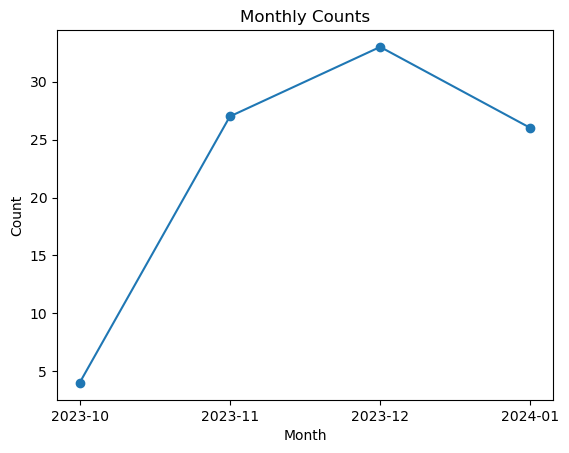

In [39]:
# 绘制直方图
plt.plot(monthly_counts,"o-")

# 添加标签和标题
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts')

# 显示图形
plt.show()

In [49]:
df = data_all.copy()
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

In [50]:
labels_str= df['labels'].copy()
labels_str= labels_str.astype(str)
print(labels_str)

0        ['question']
1             ['bug']
2             ['bug']
3        ['question']
4             ['bug']
           ...       
85                 []
86            ['bug']
87            ['bug']
88    ['enhancement']
89       ['question']
Name: labels, Length: 90, dtype: object


In [51]:
filtered_labels = labels_str.dropna()

labels_counts = pd.Series(filtered_labels).value_counts()
print(labels_counts)

labels
['bug']                          37
['question']                     25
['enhancement']                  16
['dependencies', 'automatic']     6
[]                                3
['automatic']                     3
Name: count, dtype: int64


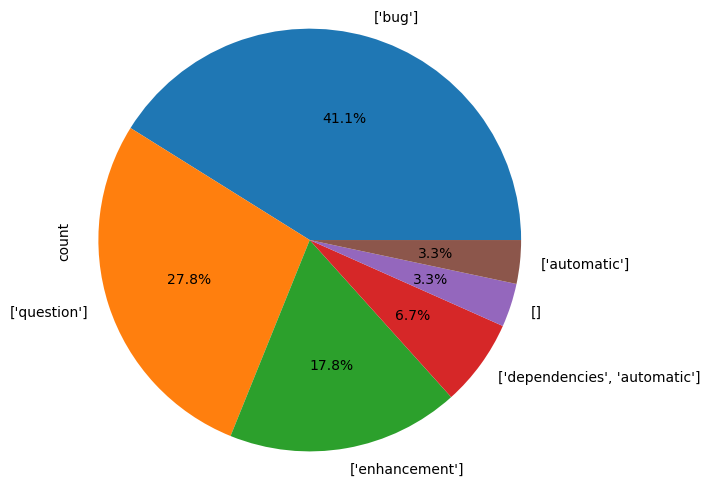

In [52]:
plt.figure(figsize=(6, 6))
labels_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # 使饼图呈现为圆形
plt.show()

In [53]:
time_difference_array = np.array(df['updated_at']-df['created_at'])
time_difference_days = time_difference_array.astype('timedelta64[D]')
print(time_difference_days)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  9  0  0  0  0  0  0  0
  1  0 16  0  0  0  0  8 14  0  0  0  0  0  0  0  0 26  3  5  0  3  0  0
  0  0  0  0  0  0 12  0  0  2  0  0 51  0 54  0  7 25 47 17  0  0  3  0
  0  0  0 16  0  4  0 64  0  0 14  0  0  0  0 13 14  0]


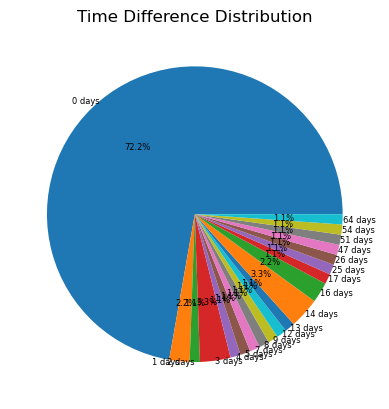

In [54]:
# 计算每个唯一值的频率
unique_values, counts = np.unique(time_difference_days, return_counts=True)

# 绘制饼状图
plt.pie(counts, labels=unique_values, autopct='%1.1f%%',labeldistance=1,
        textprops={'fontsize': 6})
plt.title('Time Difference Distribution')
plt.show()